https://github.com/hasibzunair/decathlon-ssl/tree/master/notebooks/graphs
https://github.com/hasibzunair/unet-segmentation/blob/ad3a6e87fd8d21ab6061d824806a827f93ca4280/inspect_model_CVC_ClinicDB.ipynb

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import os 
sns.set()

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot

In [ ]:

labels = ['U-Net', 'LeViT-384']

# Glas dataset results
# auc = [67.412, 73.884] # base
# acc_nst = [67.807, 74.528] # cb
# acc = [68.319, 76.059] # cb ts

# polyp - CVC-ClinicDB
auc = [69.737,81.385] # base
acc_nst = [72.513,82.444] # cb
acc = [73.599, 84.022] # cb ts

# NYU
# auc = [33.602,34.742] # base
# acc_nst = [38.261,39.118] # cb
# acc = [38.535,39.313] # cb ts


x = np.arange(len(labels))  # the label locations
dummy = np.arange(10)

width = 0.25 #0.4  # the width of the bars



fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, auc, width, label='Base')
rects2 = ax.bar(x + width/2, acc_nst, width, label='w/ CB (Ours)')
rects211 = ax.bar(x + width/2 * 3.08, acc, width, label='w/ CB + TS (Ours)')

ax.set_ylabel('mIoU (%)', fontsize=18)
#ax.set_title('Results')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0, fontsize=18)

#for i in range(18):
#    ax.get_xticklabels()[i].set_color("white")

# Scne
#ax.set_ylim([30, 44])
# polyp
ax.set_ylim([65,90])
# Glas
#ax.set_ylim([65,80])

#ax.legend(loc="upper left", prop={'size': 14})
ax.grid(True)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=0, fontsize=15)
        #ax.set_ylim(ymin=1)
        

def autolabel_(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', rotation=0, fontsize=15)
        #ax.set_ylim(ymin=1)


autolabel(rects1) # %
autolabel(rects2)
autolabel_(rects211) # %

fig.tight_layout()
fig.set_size_inches(10, 4, forward=True)
plt.title('Polyp Segmentation (\u2191)', loc='left', fontsize=18, color='gray', pad=12)
#plt.legend()
plt.savefig("../logs/plots/polyp_ablation.pdf", bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

In [ ]:
#
def read_txt(path, loss):
    
    data = []
    with open(path, 'r') as f:
        for line in f:
            
            if loss != True:
                line = float(line[:4]) * 10
                #line = float(line)
            else:
                #import ipdb; ipdb.set_trace()
                #line = float(line[:4]) / 10
                line = float(line)
            
            data.append(line)
        f.close()
    
    return data

### Plot IoU graphs

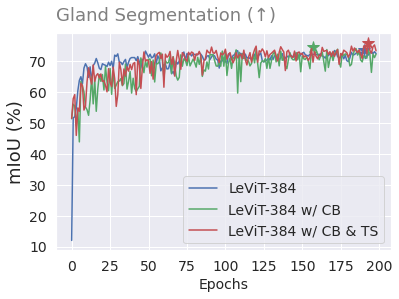

In [52]:
# Glas iou graphs
base = read_txt(os.path.join("../logs/glas_experiments/glas_levit384", "glas_levit_jacs.txt"), loss=False)
cb = read_txt(os.path.join("../logs/glas_experiments/glas_levit384_cb_h", "glas_levit384_cb_h_jacs.txt"), loss=False)
ts = read_txt(os.path.join("../logs/glas_experiments/glas_exp_best", "glas_exp_jacs.txt"), loss=False)


interval = min(len(base), len(cb))
epochs = range(interval)
plt.plot(epochs, base[:interval], 'b', label="LeViT-384")
base_score = max(base) 
base_param_val_index = base.index(base_score)
plt.plot(base_param_val_index, base_score, color='b', marker='*', markersize=12)


plt.plot(epochs, cb[:interval], 'g', label='LeViT-384 w/ CB')
cb_score = max(cb) 
cb_param_val_index = cb.index(cb_score)
plt.plot(cb_param_val_index, cb_score, color='g', marker='*', markersize=12)

plt.plot(epochs, ts[:interval], 'r', label='LeViT-384 w/ CB & TS')
ts_score = max(ts) 
ts_param_val_index = ts.index(ts_score)
plt.plot(ts_param_val_index, ts_score, color='r', marker='*', markersize=12)


plt.title('Gland Segmentation (\u2191)', loc='left', fontsize=18, color='gray', pad=12)

ft = 14
plt.ylabel('mIoU (%)', fontsize=18)
plt.xlabel('Epochs', fontsize=ft)
plt.yticks(fontsize=ft)
plt.xticks(fontsize=ft)
plt.legend(loc='lower right', fontsize=14)
plt.savefig('../logs/plots/glas_iou_graph.pdf', bbox_inches='tight', pad_inches=0, dpi=300)

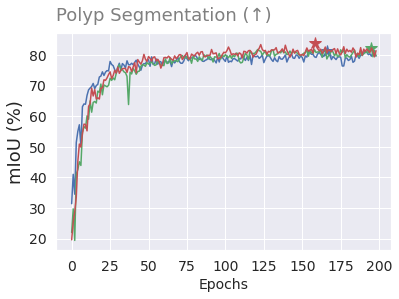

In [51]:
# Polyps iou graph
# polyp
base = read_txt(os.path.join("../logs/polyp_experiments/polys_levit384", "polys_levit384_jacs.txt"), loss=False)
cb = read_txt(os.path.join("../logs/polyp_experiments/polys_levit384_cb_h", "polys_levit384_cb_h_jacs.txt"), loss=False)
ts = read_txt(os.path.join("../logs/polyp_experiments/polys_levit384_cb_ts_h", "polys_levit384_cb_ts_h_jacs.txt"), loss=False)

interval = min(len(base), len(cb))
epochs = range(interval)
plt.plot(epochs, base[:interval], 'b', label="LeViT-384")
base_score = max(base) 
base_param_val_index = base.index(base_score)
plt.plot(base_param_val_index, base_score, color='b', marker='*', markersize=12)


plt.plot(epochs, cb[:interval], 'g', label='LeViT-384 + CB')
cb_score = max(cb) 
cb_param_val_index = cb.index(cb_score)
plt.plot(cb_param_val_index, cb_score, color='g', marker='*', markersize=12)

plt.plot(epochs, ts[:interval], 'r', label='LeViT-384 + CB + TS')
ts_score = max(ts) 
ts_param_val_index = ts.index(ts_score)
plt.plot(ts_param_val_index, ts_score, color='r', marker='*', markersize=12)


plt.title('Polyp Segmentation (\u2191)', loc='left', fontsize=18, color='gray', pad=12)

ft = 14
plt.ylabel('mIoU (%)', fontsize=18)
plt.xlabel('Epochs', fontsize=ft)
plt.yticks(fontsize=ft)
plt.xticks(fontsize=ft)
#plt.legend(loc='lower right', fontsize=14)
plt.savefig('../logs/plots/polyp_iou_graph.pdf', bbox_inches='tight', pad_inches=0, dpi=300)

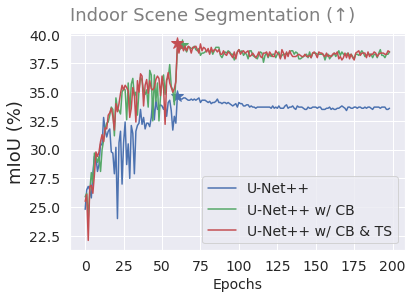

In [50]:
# Nyu iou graph
# nyu
base = read_txt(os.path.join("../logs/nyu_experiments/nyu_nestunet", "nyu_nestunet_jacs.txt"), loss=False)
cb = read_txt(os.path.join("../logs/nyu_experiments/nyu_nestunet_cb_h", "nyu_nestunet_cb_h_jacs.txt"), loss=False)
ts = read_txt(os.path.join("../logs/nyu_experiments/nyu_nestunet_cb_ts_h", "nyu_nestunet_cb_ts_h_jacs.txt"), loss=False)

interval = min(len(base), len(cb))
epochs = range(interval)
plt.plot(epochs, base[:interval], 'b', label="U-Net++")
base_score = max(base) 
base_param_val_index = base.index(base_score)
plt.plot(base_param_val_index, base_score, color='b', marker='*', markersize=12)


plt.plot(epochs, cb[:interval], 'g', label='U-Net++ w/ CB')
cb_score = max(cb) 
cb_param_val_index = cb.index(cb_score)
plt.plot(cb_param_val_index, cb_score, color='g', marker='*', markersize=12)

plt.plot(epochs, ts[:interval], 'r', label='U-Net++ w/ CB & TS')
ts_score = max(ts) 
ts_param_val_index = ts.index(ts_score)
plt.plot(ts_param_val_index, ts_score, color='r', marker='*', markersize=12)


plt.title('Indoor Scene Segmentation (\u2191)', loc='left', fontsize=18, color='gray', pad=12)

ft = 14
plt.ylabel('mIoU (%)', fontsize=18)
plt.xlabel('Epochs', fontsize=ft)
plt.yticks(fontsize=ft)
plt.xticks(fontsize=ft)
plt.legend(loc='lower right', fontsize=14)
plt.savefig('../logs/plots/scene_iou_graph.pdf', bbox_inches='tight', pad_inches=0, dpi=300)

In [ ]:
# Read Jaccard and Loss

# base_l = read_txt(os.path.join("../logs/glas_experiments/glas_levit384", "glas_levit_loss.txt"), loss=True)
# cb_l = read_txt(os.path.join("../logs/glas_experiments/glas_levit384_cb_h", "glas_levit384_cb_h_loss.txt"), loss=True)
# ts_l = read_txt(os.path.join("../logs/glas_experiments/glas_exp_best", "glas_exp_loss.txt"), loss=True)

# interval = min(len(base), len(cb))
# epochs = range(interval)
# plt.plot(epochs, base_l[:interval], 'b')
# plt.plot(epochs, cb_l[:interval], 'g')
# plt.plot(epochs, ts_l[:interval], 'r')

# #plt.title('Gland Segmentation (\u2191)', loc='left', fontsize=18, color='gray', pad=12)
# plt.title('Gland Segmentation (\u2193)', loc='left', fontsize=18, color='gray', pad=12)


# ft = 15
# #plt.ylabel('mIoU (%)', fontsize=ft)
# plt.ylabel('mean squared error', fontsize=ft)
# plt.xlabel('Epochs', fontsize=ft)
# plt.yticks(fontsize=ft)
# plt.xticks(fontsize=ft)
# #plt.legend(['LeViT-384', 'LeViT-384 + CB', 'LeViT-384 + CB +TS'], loc='lower right', fontsize=14)
# plt.legend(['LeViT-384', 'LeViT-384 + CB', 'LeViT-384 + CB +TS'], loc='upper right', fontsize=14)
# #plt.savefig('../logs/plots/glas_iou_graph.pdf', bbox_inches='tight', pad_inches=0, dpi=300)
# plt.savefig('../logs/plots/glas_mse_graph.pdf', bbox_inches='tight', pad_inches=0, dpi=300)